In [1]:
from unet_project.image_utils import ImageUtils
from unet_project.data_augmentation import DataAugmentation
from unet_project.u_net import Unet
from unet_project.create_patches import PatchesCreator
from skimage.io import imshow
from matplotlib import pyplot as plt
import numpy as np
import cv2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from skimage.io import imshow
from matplotlib import pyplot as plt
import random
from keras.models import load_model
from tqdm import tqdm_notebook

Using TensorFlow backend.


In [2]:
path_to_imgs = '/home/ajuska/Dokumenty/Skola/diplomka/disk_data/imgs/'
path_to_masks = '/home/ajuska/Dokumenty/Skola/diplomka/disk_data/masks/'
img_height = 224
img_width = 224
img_channels = 3

image_utils = ImageUtils(path_to_imgs, path_to_masks, img_height, img_width)
imgs_masks = image_utils.get_preprocessed_images()

data_augmentor = DataAugmentation(imgs_masks, how_many=1)
aug_imgs, aug_masks = data_augmentor.extend_database()

# imgs = []
# masks = []
# for key, val in tqdm_notebook(imgs_masks.items()):
#     imgs.append(val[0])
#     masks.append(val[1])

trainX = [cv2.resize(x, (img_height, img_width)) for x in aug_imgs]
trainY = [cv2.resize(x, (img_height, img_width)) for x in aug_masks]

  3%|▎         | 6/186 [00:00<00:03, 53.04it/s]

Loading images.


100%|██████████| 186/186 [00:03<00:00, 60.64it/s]



Loading masks.


  0%|          | 0/186 [00:00<?, ?it/s]/home/ajuska/Dokumenty/Skola/diplomka/diplomka/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
  1%|          | 2/186 [00:00<00:10, 17.22it/s]


Preprocessing images.

Extending database.


100%|██████████| 186/186 [00:14<00:00, 13.16it/s]


In [3]:
trainX = np.array([x/255 for x in trainX])
trainY = np.array([np.expand_dims(x/255, axis=-1) for x in trainY])

In [4]:
trainY.shape

(372, 224, 224, 1)

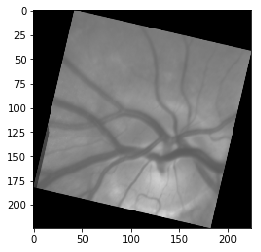

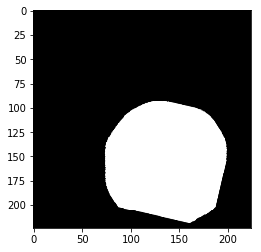

In [6]:
plt.figure()
plt.imshow(trainX[95])
plt.figure()
plt.imshow(np.squeeze(trainY[95]), cmap='gray')

In [ ]:
unet = Unet(img_height=img_height, img_width=img_width, img_channels=img_channels)
model = unet.create_model()
earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('model-test.h5', verbose=1, save_best_only=True)
results = model.fit(trainX, trainY, validation_split=0.1, batch_size=32, epochs=50,
                    callbacks=[earlystopper, checkpointer])

Creating model.
Train on 334 samples, validate on 38 samples
Epoch 1/50
256/334 [=====================>........] - ETA: 1:29 - loss: 0.6979 - acc: 0.6051

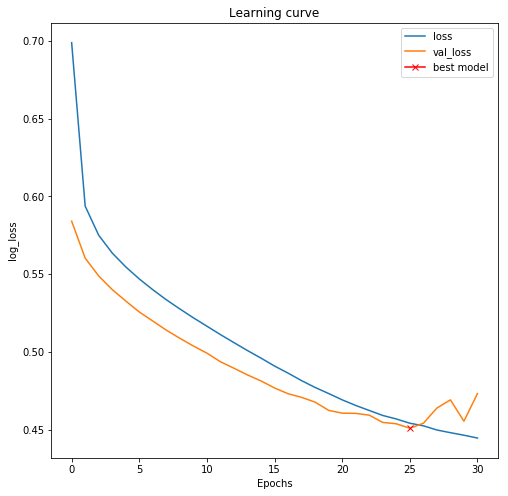

In [11]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [23]:
preds = model.predict(trainX[10:20])
preds_t = (preds > 0.13)

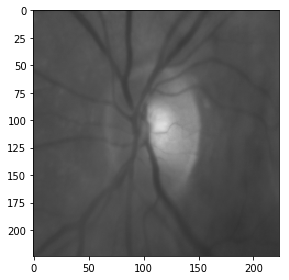

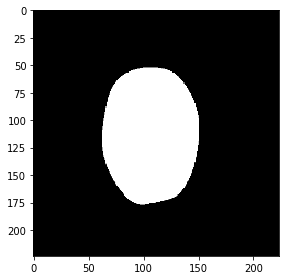

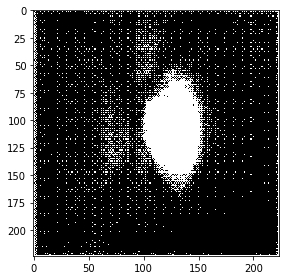

In [25]:
imshow(trainX[15])
plt.show()
imshow(np.squeeze(trainY[15]))
plt.show()
imshow(np.squeeze(preds_t[5]))
plt.show()